# Laboratorio 3
Alina Carías, Daniel Machic, Ariela Mishaan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Task 1

### **Ejercicio 1:** Calcular eigenvalores para las matrices. 


La matriz del segundo momento es:

$$
M =
\begin{bmatrix}
120 & 5 \\
5 & 115
\end{bmatrix}
$$

Y la segunda matriz es:

$$
M' =
\begin{bmatrix}
200 & 10 \\
10 & 1
\end{bmatrix}
$$



#### 1. Polinomios característicos



$$
M -\lambda I=
\begin{bmatrix}
120 -\lambda & 5 \\
5 & 115 - \lambda
\end{bmatrix}
$$ 

$$\to P(\lambda) = det(M -\lambda I) = (120-\lambda)(115-\lambda) - 25$$

$$M' - \lambda I =
\begin{bmatrix}
200-\lambda & 10 \\
10 & 1-\lambda
\end{bmatrix}
$$

$$\to P'(\lambda) = det(M' - \lambda I) = (200 - \lambda)(1-\lambda)-100 $$


#### 2. Calcular Eigenvalores (Soluciones del polinomio cracterístico)

**Para M:**
$$(120-\lambda)(115-\lambda) -25 = 0$$
$$\lambda^2 - 235\lambda + 13775 = 0$$

$$
\begin{aligned}
\lambda_1 &\approx 122.07 \\
\lambda_2 &\approx 112.93
\end{aligned}
$$


**Para M':**
$$(200-\lambda)(1-\lambda) -100 = 0$$
$$200 - 200\lambda - \lambda + \lambda^2 - 100 = 0$$
$$\lambda^2 - 201\lambda + 100 = 0$$

$$
\begin{aligned}
\lambda_1 &\approx 200.50 \\
\lambda_2 &\approx 0.50
\end{aligned}
$$

#### 3. Comprobación con Python

In [2]:
M = np.array([[120, 5],
              [5,  115]])
M_barra = np.array([[200, 10],
              [10,  1]])

eigenvaluesM, eigenvectorsM = np.linalg.eig(M)
eigenvaluesM_barra, eigenvectorsM_barra = np.linalg.eig(M_barra)

print("Eigenvalores de M: ", eigenvaluesM)
print("Eigenvalores de M': ", eigenvaluesM_barra)


Eigenvalores de M:  [123.09016994 111.90983006]
Eigenvalores de M':  [200.50124999   0.49875001]


### **Ejercicio 2:** Calcular Respuesta de Harris (R) con k = 0.04

La respuesta de Harris se define como:

$$
R = \det(M) - k \cdot (\text{trace}(M))^2
$$

donde $k = 0.04$

#### Matriz M

- Determinante: 
  
  $$det(M) = 120 \cdot 115 - 25 = 13 775$$

- Traza:
  
  $$trace(M) = 120 + 115 = 235$$

- Respuesta de Harris: 
  
  $$R = 13775 - 0.04\cdot (235)^2 = \mathbf{11566}$$

#### Matriz M'

- Determinante: 
  
  $$det(M') = 200 \cdot 1 - 100 = 100$$

- Traza:
  
  $$trace(M') = 200 +1 = 201$$

- Respuesta de Harris: 
  
  $$R = 100 - 0.04\cdot (201)^2 = \mathbf{-1516.04}$$

### **Ejercicio 3:** Interpretación

Con los datos calculados se puede determinar la representación de pixeles de dos maneras distintas: con la respuesta de Harris y con los eigenvalores. 

**1. Respuesta de Harris:** 
- $R >> 0$: Esquina
- $R <0$: Borde
- $R \approx 0$: Región plana

**2. Eigenvalores**
- $\lambda_1, \lambda_2 >> 0$: Esquina
- $\lambda_1 >> \lambda_2$ o viceversa: Borde
- $\lambda_1, \lambda_2 \approx 0$: Región plana

Para las matrices analizadas: 

- **Matriz M**: El valor de **R** es mucho mayor a 0, también los dos eigenvalores son positivos. Esto indica que M representa un pixel en una **esquina**. 
  
- **Matriz M'**: El valor d e **R** es negativo; el primer eigenvalor es mucho mayor al segundo. Esto indica que M' representa un pixel en un **borde**. 

## Task 2

### Cargar imágenes

In [3]:
img1_path = "foto1.jpeg"  # Vista frontal
img2_path = "foto2.jpeg"  # Vista rotada y con cambio de escala

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

#cambiar a escala de grises
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

print(f"  Imagen 1: {gray1.shape}")
print(f"  Imagen 2: {gray2.shape}")

  Imagen 1: (1280, 960)
  Imagen 2: (1600, 1200)


### Implementación de detección y descripción con SIFT

In [4]:
print("\n" + "="*60)
print("PARTE 1: SIFT")
print("="*60)

# Crear el detector SIFT
sift = cv2.SIFT_create()

kp1_sift, des1_sift = sift.detectAndCompute(gray1, None)
kp2_sift, des2_sift = sift.detectAndCompute(gray2, None)

print(f"Keypoints detectados en imagen 1: {len(kp1_sift)}")
print(f"Keypoints detectados en imagen 2: {len(kp2_sift)}")


PARTE 1: SIFT
Keypoints detectados en imagen 1: 3015
Keypoints detectados en imagen 2: 10739


### Implementación de detección y descripción con ORB

In [5]:
print("\n" + "="*60)
print("PARTE 2: ORB")
print("="*60)

# Crear el detector ORB 
orb = cv2.ORB_create(nfeatures=2000)

kp1_orb, des1_orb = orb.detectAndCompute(gray1, None)
kp2_orb, des2_orb = orb.detectAndCompute(gray2, None)

print(f"Keypoints detectados en imagen 1: {len(kp1_orb)}")
print(f"Keypoints detectados en imagen 2: {len(kp2_orb)}")


PARTE 2: ORB
Keypoints detectados en imagen 1: 2000
Keypoints detectados en imagen 2: 2000


### Matching

#### SIFT (L2 Euclidiana)

In [6]:
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

# Encontrar los 2 mejores matches
matches_sift = bf_sift.knnMatch(des1_sift, des2_sift, k=2)

print(f"Total de matches encontrados: {len(matches_sift)}")

Total de matches encontrados: 3015


#### ORB (Hamming)

In [7]:
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

# Encontrar los 2 mejores matches
matches_orb = bf_orb.knnMatch(des1_orb, des2_orb, k=2)

print(f"Total de matches encontrados: {len(matches_orb)}")

Total de matches encontrados: 2000


### Implementación de Lowe's Ratio Test

#### SIFT

In [8]:
good_matches_sift = []

for match_pair in matches_sift:
    # Verificar metches
    if len(match_pair) == 2:
        m, n = match_pair  
        if m.distance < 0.75 * n.distance:
            good_matches_sift.append(m)

print(f"Buenos matches después del filtro: {len(good_matches_sift)}")
print(f"Porcentaje de inliers: {len(good_matches_sift)/len(matches_sift)*100:.2f}%")

Buenos matches después del filtro: 348
Porcentaje de inliers: 11.54%


#### ORB

In [9]:
good_matches_orb = []

for match_pair in matches_orb:
    if len(match_pair) == 2:
        m, n = match_pair
        if m.distance < 0.75 * n.distance:
            good_matches_orb.append(m)

print(f"Buenos matches después del filtro: {len(good_matches_orb)}")
print(f"Porcentaje de inliers: {len(good_matches_orb)/len(matches_orb)*100:.2f}%")

Buenos matches después del filtro: 19
Porcentaje de inliers: 0.95%


### Generar imagen

#### SIFT

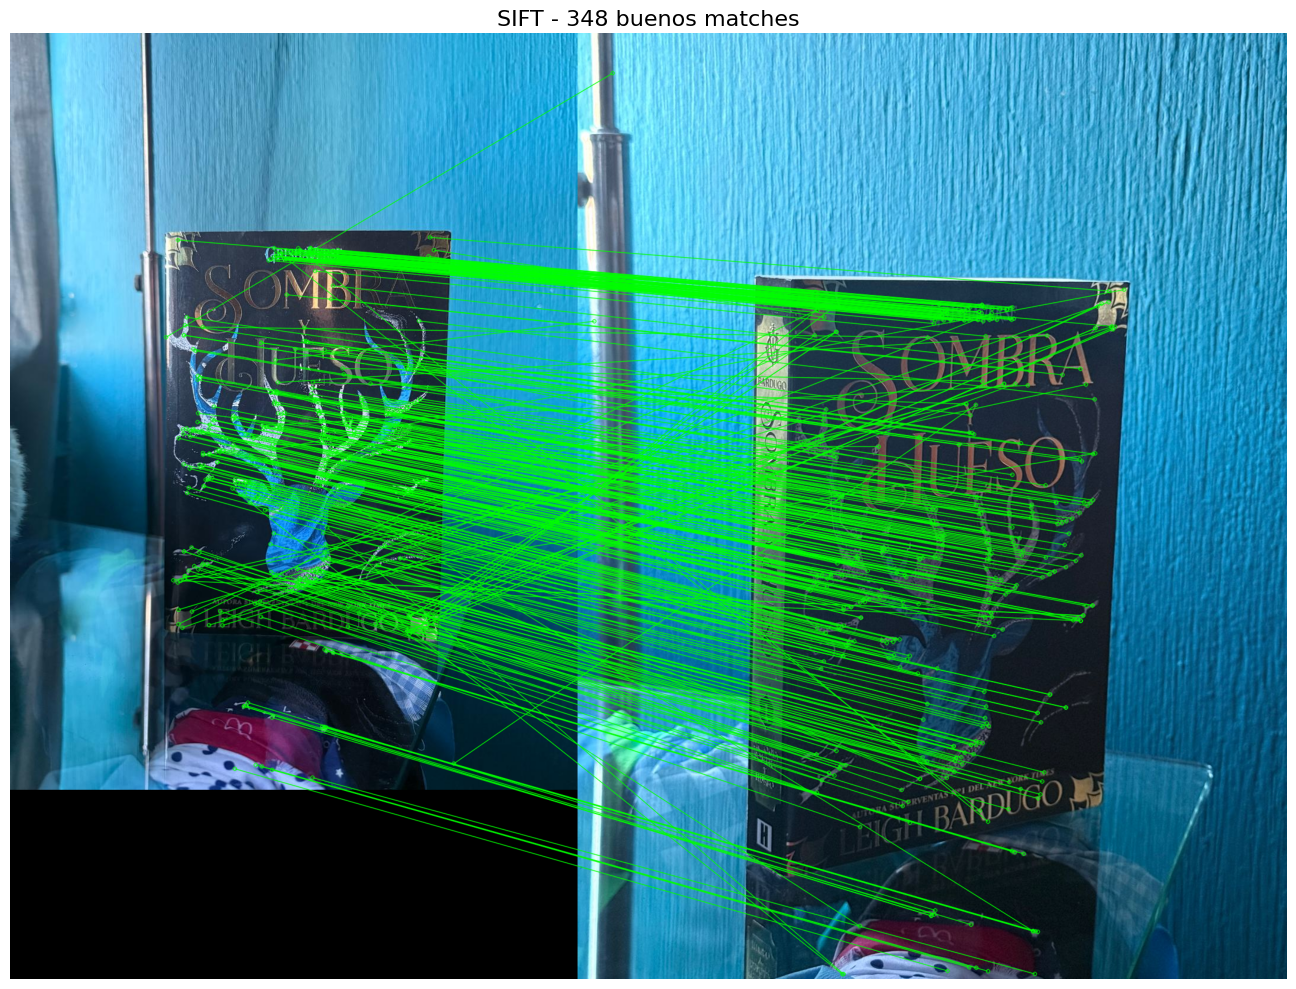

guardado como 'resultado_sift.jpg'


In [10]:
img_matches_sift = cv2.drawMatches(
    img1, kp1_sift,     
    img2, kp2_sift,     
    good_matches_sift,  
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
    matchColor=(0, 255, 0),      # Verde para las líneas
    singlePointColor=(255, 0, 0) # Rojo para los puntos
)

plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img_matches_sift, cv2.COLOR_BGR2RGB))
plt.title(f'SIFT - {len(good_matches_sift)} buenos matches', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Guardar imagen
cv2.imwrite("resultado_sift.jpg", img_matches_sift)
print("guardado como 'resultado_sift.jpg'")

#### ORB

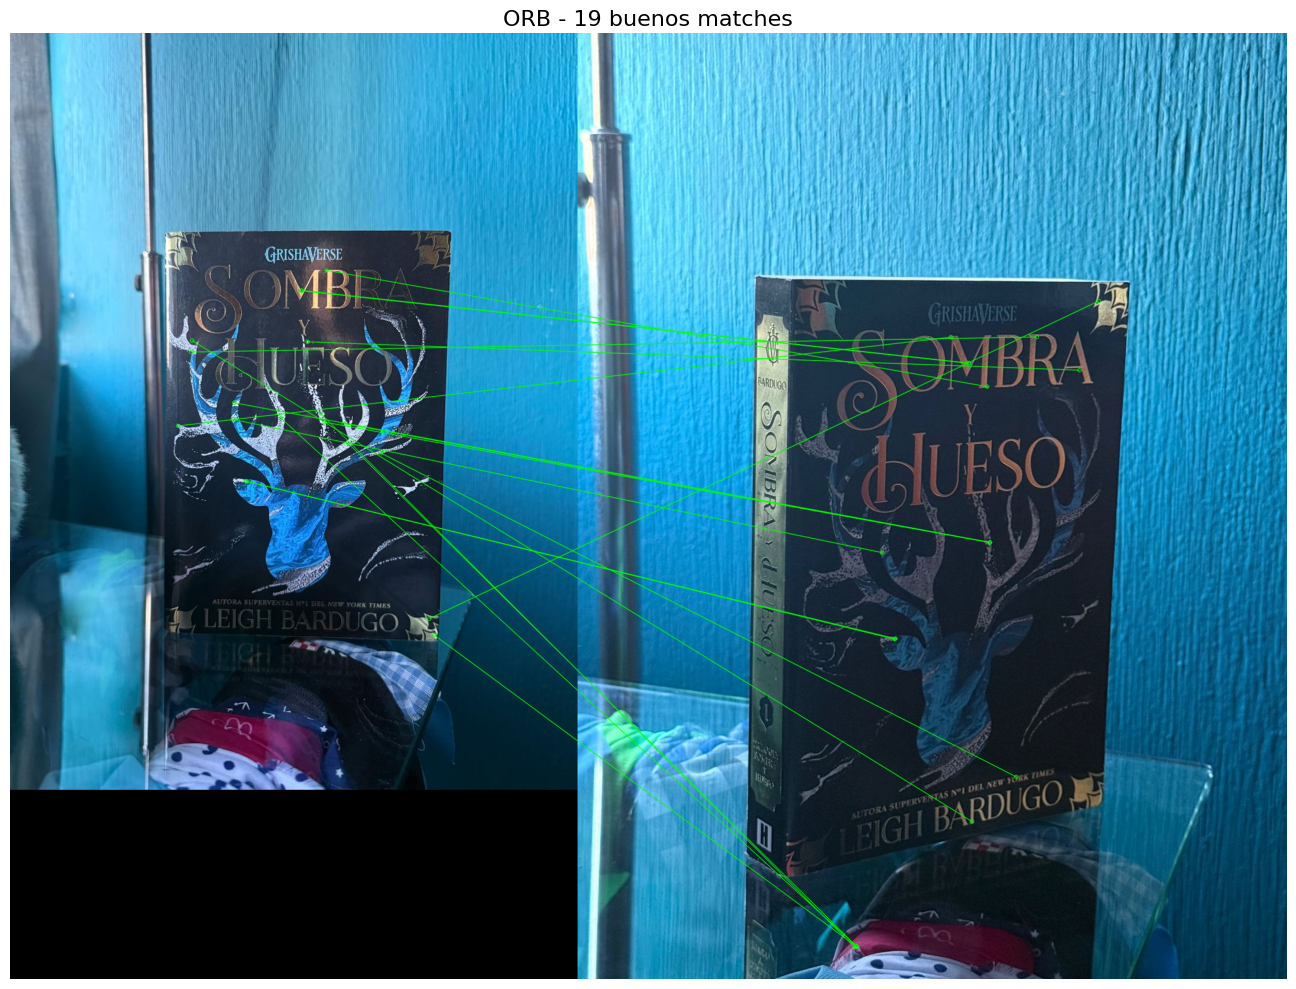

guardado como 'resultado_orb.jpg'


In [11]:
img_matches_orb = cv2.drawMatches(
    img1, kp1_orb,
    img2, kp2_orb,
    good_matches_orb,
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
    matchColor=(0, 255, 0),
    singlePointColor=(255, 0, 0)
)

plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img_matches_orb, cv2.COLOR_BGR2RGB))
plt.title(f'ORB - {len(good_matches_orb)} buenos matches', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Guardar imagen
cv2.imwrite("resultado_orb.jpg", img_matches_orb)
print("guardado como 'resultado_orb.jpg'")

## Task 3